# <font color=Dark> Keyward Extraction & Topic Modelling </font>

<hr style="border:2px solid gray">

### Importing Libraries and Datatset

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing plotting libraries
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Importing NLP library
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import string
import re
from textblob import TextBlob
from spellchecker import SpellChecker
from langdetect import detect

In [2]:
#Importing Dataset

df0 = pd.read_csv('IMDB_final.csv')
df0

,User_name,Review_date,Title,Review,Review_Rating,Movie_name
0,drmayurc,7 November 2022,Reality of medical services,Shown exact situation of medical services at c...,10/10,Daman
1,sumanmohanty-09208,6 November 2022,A masterpiece.The best odia movie.One of the b...,The best Odia movie. One of the best movies ti...,10/10,Daman
2,soumenmohapatra,7 November 2022,Must Watch.,Must watch.One of the best Odia movies so far ...,10/10,Daman
3,ajitrajuraju,8 November 2022,#DAMAN A Must watch,"I feel overwhelmed by the movie, such a movie ...",10/10,Daman
4,pradhansunil-75942,7 November 2022,Epic with Masterpiece,Seriously it's been a long time since any odia...,10/10,Daman
...,...,...,...,...,...,...
2337,harishnj,14 April 2022,Rocky's world of KGF,KGF Chapter 2 had connected well to where its ...,10/10,K.G.F: Chapter 2
2338,narisetipraneeth,14 April 2022,The legacy of Rocky,11:42am\n14-04-2022.Just now completed the sho...,10/10,K.G.F: Chapter 2
2339,meetjoy,2 May 2022,Very badly overrated 0 acting skill movie.,And the award goes to Yash's hairstylist and w...,1/10,K.G.F: Chapter 2
2340,coolboy-87738,14 May 2022,Overrated movie,"Same old cliche, violence without purpose.High...",1/10,K.G.F: Chapter 2


### Data Pre-Processing

In [3]:
#Dropping User Name, Date and Movie columns

df = df0.drop(['User_name', 'Review_date', 'Movie_name'], axis=1)
df

,Title,Review,Review_Rating
0,Reality of medical services,Shown exact situation of medical services at c...,10/10
1,A masterpiece.The best odia movie.One of the b...,The best Odia movie. One of the best movies ti...,10/10
2,Must Watch.,Must watch.One of the best Odia movies so far ...,10/10
3,#DAMAN A Must watch,"I feel overwhelmed by the movie, such a movie ...",10/10
4,Epic with Masterpiece,Seriously it's been a long time since any odia...,10/10
...,...,...,...
2337,Rocky's world of KGF,KGF Chapter 2 had connected well to where its ...,10/10
2338,The legacy of Rocky,11:42am\n14-04-2022.Just now completed the sho...,10/10
2339,Very badly overrated 0 acting skill movie.,And the award goes to Yash's hairstylist and w...,1/10
2340,Overrated movie,"Same old cliche, violence without purpose.High...",1/10


In [4]:
#Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          2342 non-null   object
 1   Review         2342 non-null   object
 2   Review_Rating  2342 non-null   object
dtypes: object(3)
memory usage: 55.0+ KB


In [5]:
#Getting single score in rating column

df['Review_Rating'] = df['Review_Rating'].map(lambda x: str(x)[:-3])
df

,Title,Review,Review_Rating
0,Reality of medical services,Shown exact situation of medical services at c...,10
1,A masterpiece.The best odia movie.One of the b...,The best Odia movie. One of the best movies ti...,10
2,Must Watch.,Must watch.One of the best Odia movies so far ...,10
3,#DAMAN A Must watch,"I feel overwhelmed by the movie, such a movie ...",10
4,Epic with Masterpiece,Seriously it's been a long time since any odia...,10
...,...,...,...
2337,Rocky's world of KGF,KGF Chapter 2 had connected well to where its ...,10
2338,The legacy of Rocky,11:42am\n14-04-2022.Just now completed the sho...,10
2339,Very badly overrated 0 acting skill movie.,And the award goes to Yash's hairstylist and w...,1
2340,Overrated movie,"Same old cliche, violence without purpose.High...",1


In [6]:
#converting it to float

df['Review_Rating'] = df['Review_Rating'].astype(np.float32)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          2342 non-null   object 
 1   Review         2342 non-null   object 
 2   Review_Rating  2342 non-null   float32
dtypes: float32(1), object(2)
memory usage: 45.9+ KB


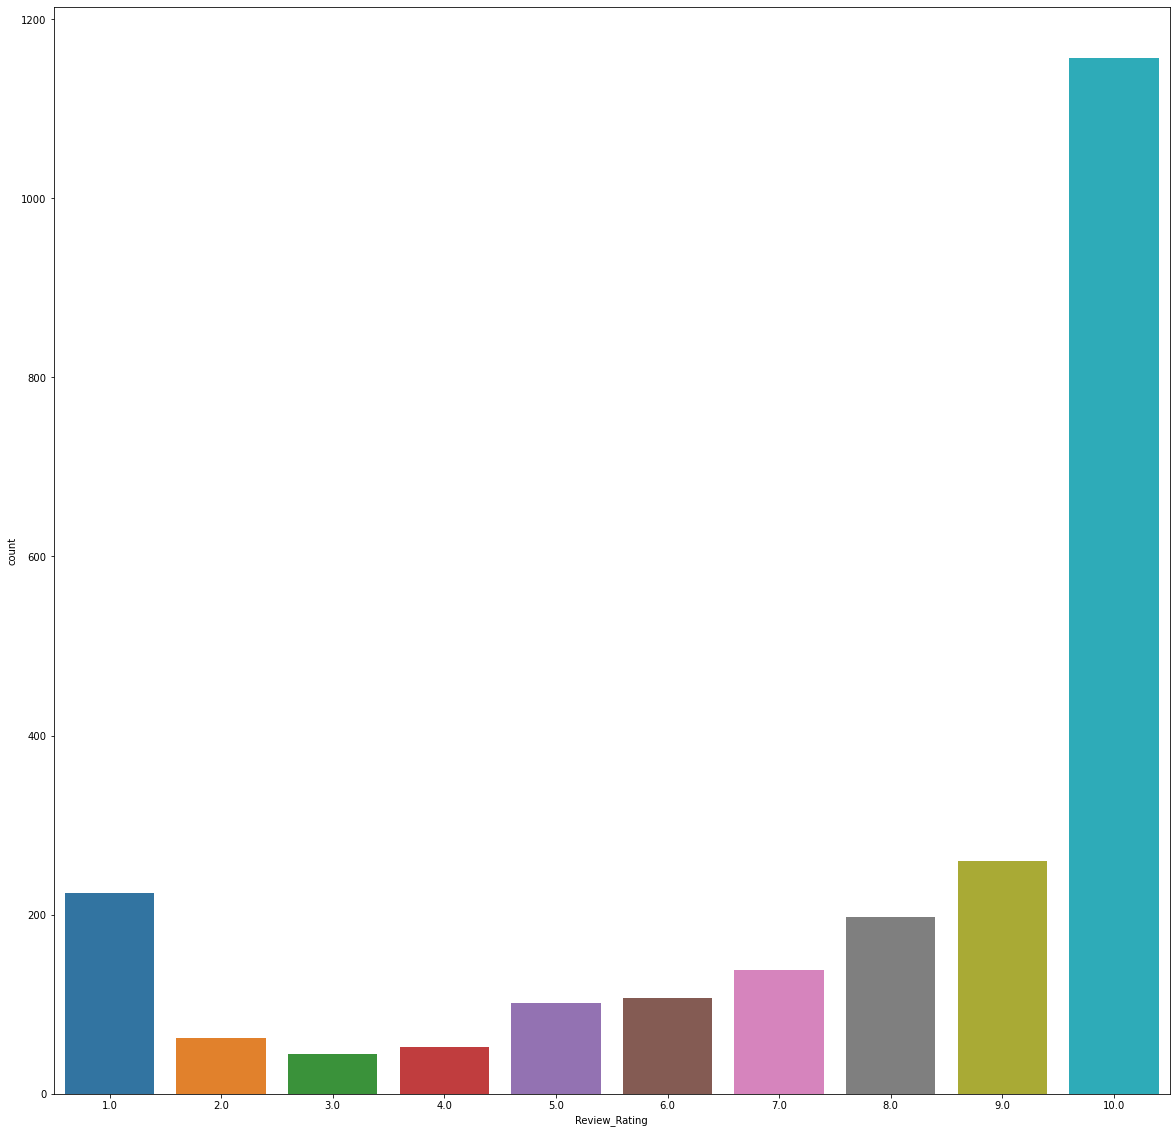

In [7]:
#Checking the distirbution of Ratings

plt.figure(figsize = (20,20))
sns.countplot(df['Review_Rating'])
plt.show()

In [8]:
#Cleaning & Removing Punctuation function

def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',"'"))
    return final

english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [9]:
#Cleaning and removing URL’s function
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

In [10]:
#Cleaning and removing Numerals function
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [11]:
#Cleaning and removing repeating characters function
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [12]:
#Removing the square brackets function
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [13]:
#Removing special characters function
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [14]:
# Lowercasing the Title & Review column

df['Title']=df['Title'].str.lower()
df['Review']=df['Review'].str.lower()

In [15]:
#Using above data processing functions to clean Title & Review columns

df['Title'] = df['Title'].apply(lambda x: cleaning_punctuations(x))
df['Title'] = df['Title'].apply(remove_punctuation)
df['Title'] = df['Title'].apply(lambda x: cleaning_URLs(x))
df['Title'] = df['Title'].apply(lambda x: cleaning_numbers(x))
df['Title'] = df['Title'].apply(lambda x: cleaning_repeating_char(x))
df['Title'] = df['Title'].apply(remove_between_square_brackets)
df['Title'] = df['Title'].apply(remove_special_characters)

df['Review'] = df['Review'].apply(lambda x: cleaning_punctuations(x))
df['Review'] = df['Review'].apply(remove_punctuation)
df['Review'] = df['Review'].apply(lambda x: cleaning_URLs(x))
df['Review'] = df['Review'].apply(lambda x: cleaning_numbers(x))
df['Review'] = df['Review'].apply(lambda x: cleaning_repeating_char(x))
df['Review'] = df['Review'].apply(remove_between_square_brackets)
df['Review'] = df['Review'].apply(remove_special_characters)

df

,Title,Review,Review_Rating
0,reality of medical services,shown exact situation of medical services at c...,10.0
1,a masterpiecethe best odia movieone of the bes...,the best odia movie one of the best movies til...,10.0
2,must watch,must watchone of the best odia movies so far w...,10.0
3,daman a must watch,i feel overwhelmed by the movie such a movie b...,10.0
4,epic with masterpiece,seriously its been a long time since any odia ...,10.0
...,...,...,...
2337,rockys world of kgf,kgf chapter had connected well to where its p...,10.0
2338,the legacy of rocky,am\njust now completed the show k g f chapter...,10.0
2339,very badly overrated acting skill movie,and the award goes to yashs hairstylist and wa...,1.0
2340,overrated movie,same old cliche violence without purposehighly...,1.0


In [16]:
#Detecting the language of Review column
df['Language']=df['Review'].apply(detect)

#checking the languages present in review columns
df.Language.value_counts()

en    2341
ro       1
Name: Language, dtype: int64

In [17]:
#Removing reviews which are not in english
df_new = df[df.Language== 'en']

In [18]:
#correcting the spellings in Title & Review Columns
from spellchecker import SpellChecker

spell  = SpellChecker()
def spell_check(x):
    correct_word = []
    mispelled_word = x.split()
    for word in mispelled_word:
        correct_word.append(spell.correction(word))
    return ' '.join(correct_word)

df_new['Title'].apply(lambda x: spell_check(x))
df_new['Review'].apply(lambda x: spell_check(x))

0       shown exact situation of medical services at c...
1       the best dia movie one of the best movies till...
2       must watching of the best dia movies so far wh...
3       i feel overwhelmed by the movie such a movie b...
4       seriously its been a long time since any dia f...
                              ...                        
2337    kif chapter had connected well to where its pr...
2338    am just now completed the show i i i chapter i...
2339    and the award goes to yash hairstylist and war...
2340    same old cliche violence without purposehighly...
2341    great movie yash sanjay duty done a great job ...
Name: Review, Length: 2341, dtype: object

In [19]:
#Removing stop words
from nltk.corpus import stopwords
stopword_list=nltk.corpus.stopwords.words('english')
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_new['Title'] = df_new['Title'].apply(lambda text: cleaning_stopwords(text))
df_new['Review'] = df_new['Review'].apply(lambda text: cleaning_stopwords(text))

In [20]:
#Adding & Removing few more words as stopword

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an','app','and','any','are', 'as', 'at', 'be', 'because', 'been', 'before','being', 'below', 'back', 'between','both', 'by', 'can', 'd', 'did', 'do','does', 'doing', 'down','driver', 'during', 'each','few', 'for', 'from','further', 'get','had', 'has', 'have', 'having', 'he', 'her', 'here','hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'im','in','into','is', 'it', 'its', 'itself', 'ive','just', 'll', 'm', 'ma','me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once','only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'still','such','than', 'that', "thatll", 'the', 'their', 'theirs', 'them','themselves', 'then', 'there', 'these', 'they', 'this', 'those','through', 'to', 'too','uber','under', 'until', 'up', 've', 'very','want', 'was','we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom','why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre","youve", 'your', 'yours', 'yourself', 'yourselves','hasnt','wants', 'movie','review','helpful','found','vote','permalink','sign']

STOPWORDS = set(stopwordlist)
def cleaning_stopwordss(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_new['Title'] = df_new['Title'].apply(lambda text: cleaning_stopwordss(text))
df_new['Review'] = df_new['Review'].apply(lambda text: cleaning_stopwordss(text))
df_new

,Title,Review,Review_Rating,Language
0,reality medical services,shown exact situation medical services cutt ar...,10.0,en
1,masterpiecethe best odia movieone best movies ...,best odia one best movies till nowst tym yrs s...,10.0,en
2,must watch,must watchone best odia movies far breaks rule...,10.0,en
3,daman must watch,feel overwhelmed beautiful facts best way put ...,10.0,en
4,epic masterpiece,seriously long time since odia film put streng...,10.0,en
...,...,...,...,...
2337,rockys world kgf,kgf chapter connected well predecessor left wo...,10.0,en
2338,legacy rocky,completed show k g f chapter truly unimaginabl...,10.0,en
2339,badly overrated acting skill,award goes yashs hairstylist wardrobe professi...,1.0,en
2340,overrated,old cliche violence without purposehighly over...,1.0,en


In [21]:
#Performing Stemming

st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

df_new['Title']= df_new['Title'].apply(lambda x: stemming_on_text(x))
df_new['Review']= df_new['Review'].apply(lambda x: stemming_on_text(x))
df_new.head()

,Title,Review,Review_Rating,Language
0,reality medical services,shown exact situation medical services cutt ar...,10.0,en
1,masterpiecethe best odia movieone best movies ...,best odia one best movies till nowst tym yrs s...,10.0,en
2,must watch,must watchone best odia movies far breaks rule...,10.0,en
3,daman must watch,feel overwhelmed beautiful facts best way put ...,10.0,en
4,epic masterpiece,seriously long time since odia film put streng...,10.0,en


In [22]:
#Performing Lemmatizer

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

df_new['Title']= df_new['Title'].apply(lambda x: lemmatizer_on_text(x))
df_new['Review']= df_new['Review'].apply(lambda x: lemmatizer_on_text(x))
df_new['Review'].head()

0    shown exact situation medical services cutt ar...
1    best odia one best movies till nowst tym yrs s...
2    must watchone best odia movies far breaks rule...
3    feel overwhelmed beautiful facts best way put ...
4    seriously long time since odia film put streng...
Name: Review, dtype: object

<hr style="border:2px solid gray">

### Extracting Keywords with High Diversity Score

In [23]:
# converting Review column into list
review = list(df_new['Review'])
  

print(review)

['shown exact situation medical services cutt areas mainland superb great acting best screenplay editing works every section well handled director producer story rural india medical facilities regarding reality despite government policies schemes ignored always well handled topic usually disscus real life much doctor people much couldnt due hand tied situation faces due lack facilities government india people affected crisis medical services', 'best odia one best movies till nowst tym yrs seats filled odia multiplex cant believe child sitting besides scolded disturbing father concentrate climax stood said doctor definitely kudos devi prasad lenka vishal mourya giving extraordinary us tight slap cuttack based called ollywood film makers retire give works kind new creative filmmakers duos mumbai making skills clearly visible screen probably remain babushanmohanty nd lead named ravis best memorable filmreally disappointing babhushan u hv bn wasting ur god gifted talent nonsense joker idio

In [24]:
# converting Title column into list
title = list(df_new['Title'])
  
print(title)

['reality medical services', 'masterpiecethe best odia movieone best movies ever made', 'must watch', 'daman must watch', 'epic masterpiece', 'masterpiece ollywood', 'daman revolution', 'masterpiece odia cinema', 'demolishing every possible cliche existing odia cinema', 'awesome', 'budget master piece', 'bollywood copy', 'learning odia industry', 'superdirection greatacting awesomestory blockbuster unbelievable wellmade inspiring wowmusic', 'masterpiece story mindblowing direction realistic acting', 'fantastic ever', 'daman', 'turning point ollywood industry', 'great family watch', 'great great creations daman odia', 'speechless', 'new chapter ollywood industry', 'must watch movietruly inspiring', 'odia best', 'excellent masterpiece', 'game changer', 'best story screenplay', 'biggest turning point ollywood industry', 'blockbuster', 'must watch turning point ollywood filmmaking', 'masterpiece cant believe', 'way', 'awesome', 'odishas must watch masterpiece', 'awesome', 'masterpiece', ''

In [25]:
#Extracting Keywords using KeyBERT

from keybert import KeyBERT

kb = KeyBERT(model = 'paraphrase-multilingual-MiniLM-L12-v2')

In [26]:
#Creating functions for extracting Keywords from Reviews and making a grouped dataframe

def get_keywords(keywords_list):
    return pd.DataFrame([item for sublist in keywords_list for item in sublist], 
                        columns=['keywords', 'sim'])

def group_keywords(df_list, n):
    df = pd.concat(df_list, axis=0)
    res = df.groupby(by='keywords').sum()/len(review)
    res = res.sort_values(by='sim', ascending=False)
    display(res.head(n))
    return res

verbose = False

print(f'Top 10 Keywords from Reviews with high diversity')

for n in range(1,3):
    print(f'n-grams= ({n},{n})')
    ngram = (n,n)
    # We are using Maximal Margin Relevance
    k1 = get_keywords(kb.extract_keywords(review, keyphrase_ngram_range=ngram,use_mmr=True, diversity=0.7))
    if verbose:
        display(k1)
    k2 = get_keywords(kb.extract_keywords(review, keyphrase_ngram_range=ngram,use_mmr=True, diversity=0.8))
    if verbose:
        display(k2)
    k3 = get_keywords(kb.extract_keywords(review, keyphrase_ngram_range=ngram,use_mmr=True, diversity=0.9))
    if verbose:
        display(k3)
    
    #Combine all results
    kw_r = group_keywords([k1,k2,k3],10)

Top 10 Keywords from Reviews with high diversity
n-grams= (1,1)


,sim
keywords,
watch,0.090611
indian,0.068090
bollywood,0.058245
movies,0.049396
screenplay,0.046259
acting,0.043305
actors,0.042462
india,0.038281
emotions,0.034929


n-grams= (2,2)


,sim
keywords,
indian cinema,0.032353
indian movies,0.013162
love story,0.010059
best movies,0.008587
indian film,0.006574
great acting,0.006453
good acting,0.006091
best film,0.006041
watch family,0.005852


In [27]:
#Creating functions for extracting Keywords from Reviews and making a grouped dataframe

def get_keywordss(keywords_list):
    return pd.DataFrame([item for sublist in keywords_list for item in sublist], 
                        columns=['keywords', 'sim'])

def group_keywordss(df_list, n):
    df = pd.concat(df_list, axis=0)
    res = df.groupby(by='keywords').sum()/len(title)
    res = res.sort_values(by='sim', ascending=False)
    display(res.head(n))
    return res

verbose = False

print(f'Top 10 Keywords from Title with high diversity')

for n in range(1,3):
    print(f'n-grams= ({n},{n})')
    ngram = (n,n)
    # We are using Maximal Margin Relevance
    k4 = get_keywordss(kb.extract_keywords(title, keyphrase_ngram_range=ngram,use_mmr=True, diversity=0.7))
    if verbose:
        display(k4)
    k5 = get_keywordss(kb.extract_keywords(title, keyphrase_ngram_range=ngram,use_mmr=True, diversity=0.8))
    if verbose:
        display(k5)
    k6 = get_keywordss(kb.extract_keywords(title, keyphrase_ngram_range=ngram,use_mmr=True, diversity=0.9))
    if verbose:
        display(k6)
    
    #Combine all results
    kw_t = group_keywordss([k4,k5,k6],10)

Top 10 Keywords from Title with high diversity
n-grams= (1,1)


,sim
keywords,
watch,0.137609
masterpiece,0.101926
story,0.086709
film,0.072217
love,0.070898
good,0.067183
best,0.065230
great,0.049786
emotional,0.041210


n-grams= (2,2)


,sim
keywords,
love story,0.038962
heart touching,0.015863
mind blowing,0.014238
master piece,0.014167
indian cinema,0.013530
worth watching,0.012897
feel good,0.011938
waste time,0.009914
pravin tambe,0.008016


<hr style="border:2px solid gray">

### Sentiment Analysis using VADER

In [28]:
#Calling the cleaned dataset
df_new

,Title,Review,Review_Rating,Language
0,reality medical services,shown exact situation medical services cutt ar...,10.0,en
1,masterpiecethe best odia movieone best movies ...,best odia one best movies till nowst tym yrs s...,10.0,en
2,must watch,must watchone best odia movies far breaks rule...,10.0,en
3,daman must watch,feel overwhelmed beautiful facts best way put ...,10.0,en
4,epic masterpiece,seriously long time since odia film put streng...,10.0,en
...,...,...,...,...
2337,rockys world kgf,kgf chapter connected well predecessor left wo...,10.0,en
2338,legacy rocky,completed show k g f chapter truly unimaginabl...,10.0,en
2339,badly overrated acting skill,award goes yashs hairstylist wardrobe professi...,1.0,en
2340,overrated,old cliche violence without purposehighly over...,1.0,en


In [29]:
#Loading VADER

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
#Create Sentiment score columns

df_new["Review"] = df_new["Review"].astype("str")
df_new["sent_neg"] = df_new["Review"].apply(lambda x: analyzer.polarity_scores(x)["neg"])
df_new["sent_neu"] = df_new["Review"].apply(lambda x: analyzer.polarity_scores(x)["neu"])
df_new["sent_pos"] = df_new["Review"].apply(lambda x: analyzer.polarity_scores(x)["pos"])
df_new["sent_comp"] = df_new["Review"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

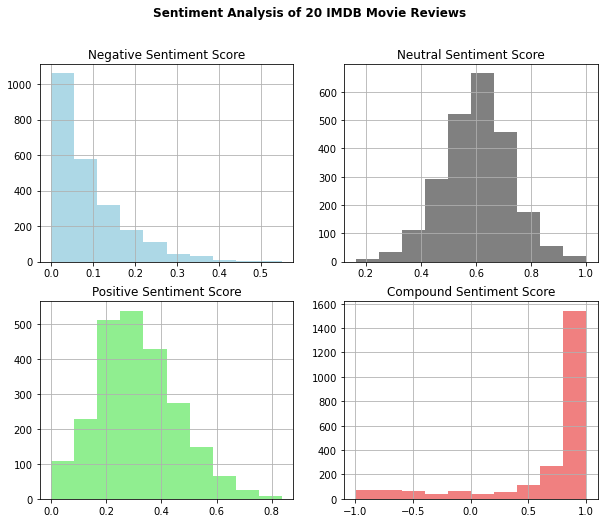

In [31]:
#Plotting the distribution of Sentiment Scores

plt.figure()

plt.subplot(2, 2, 1)
df_new["sent_neg"].hist(figsize=(10, 8), color="lightblue")
plt.title("Negative Sentiment Score")
plt.subplot(2, 2, 2)
df_new["sent_neu"].hist(figsize=(10, 8), color="grey")
plt.title("Neutral Sentiment Score")
plt.subplot(2, 2, 3)
df_new["sent_pos"].hist(figsize=(10, 8), color="lightgreen")
plt.title("Positive Sentiment Score")
plt.subplot(2, 2, 4)
df_new["sent_comp"].hist(figsize=(10, 8), color="lightcoral")
plt.title("Compound Sentiment Score")

plt.suptitle('Sentiment Analysis of 20 IMDB Movie Reviews', fontsize=12, fontweight='bold');

plt.show()

### <font color=Dark>On observing the above graphs, since the compound score is mostly greater than 0, we can conclude that the majority of Reviews have a positive Sentiment. </font>

### LDA Analysis

In [32]:
import gensim, spacy
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', 'almost', 'be', 'know', 
                   'new', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see',
                   'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 
                   'right', 'line', 'even', 'also', 'may', 'take', 'come','call','give', 'much'])

In [33]:
#Converting Reviews list to Unigrams

def sent_to_words(sentences):
    for sent in sentences:
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

data_words = list(sent_to_words(review))
print(data_words[:1])

[['shown', 'exact', 'situation', 'medical', 'services', 'cutt', 'areas', 'mainland', 'superb', 'great', 'acting', 'best', 'screenplay', 'editing', 'works', 'every', 'section', 'well', 'handled', 'director', 'producer', 'story', 'rural', 'india', 'medical', 'facilities', 'regarding', 'reality', 'despite', 'government', 'policies', 'schemes', 'ignored', 'always', 'well', 'handled', 'topic', 'usually', 'disscus', 'real', 'life', 'much', 'doctor', 'people', 'much', 'couldnt', 'due', 'hand', 'tied', 'situation', 'faces', 'due', 'lack', 'facilities', 'government', 'india', 'people', 'affected', 'crisis', 'medical', 'services']]


In [34]:
# Build the bigram and trigram models

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def clean_text(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load("en_core_web_sm")
    #Applying Lemmatization
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

final_review = clean_text(data_words)

In [35]:
#LDA modelling

# Create Dictionary
id2word = corpora.Dictionary(final_review)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in final_review]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

print(lda_model.print_topics())

[(0, '0.046*"watch" + 0.037*"great" + 0.029*"part" + 0.024*"good" + 0.021*"film" + 0.016*"really" + 0.015*"job" + 0.014*"must" + 0.012*"love" + 0.010*"end"'), (1, '0.040*"chapter" + 0.020*"film" + 0.016*"director" + 0.013*"character" + 0.012*"plot" + 0.012*"yash" + 0.009*"end" + 0.009*"lead" + 0.008*"kgf" + 0.007*"deliver"'), (2, '0.027*"people" + 0.021*"indian" + 0.015*"hero" + 0.015*"life" + 0.014*"struggle" + 0.012*"man" + 0.010*"real" + 0.010*"sense" + 0.010*"bollywood" + 0.010*"live"'), (3, '0.037*"story" + 0.028*"well" + 0.023*"scene" + 0.019*"time" + 0.018*"good" + 0.016*"action" + 0.016*"first" + 0.015*"movie" + 0.012*"act" + 0.012*"feel"')]


In [36]:
# Getting dominant topic, percentage contirbution and Keywords

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=review):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=final_review)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contribution', 'Keywords', 'Text']
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contribution,Keywords,Text
0,0,1.0,0.4036,"chapter, film, director, character, plot, yash...","[show, exact, situation, area, mainland, great..."
1,1,3.0,0.9276,"story, well, scene, time, good, action, first,...","[well, good, movie, believe, child_sitte, clim..."
2,2,0.0,0.8232,"watch, great, part, good, film, really, job, m...","[must, watchone, well, odia, movie, far, rule,..."
3,3,2.0,0.6592,"people, indian, hero, life, struggle, man, rea...","[feel, overwhelmed, beautiful, fact, good, way..."
4,4,3.0,0.8452,"story, well, scene, time, good, action, first,...","[seriously, long, time, film, put, strength, a..."
...,...,...,...,...,...
2336,2336,3.0,0.3832,"story, well, scene, time, good, action, first,...","[kgf_chapter, connected, well, predecessor, le..."
2337,2337,0.0,0.3886,"watch, great, part, good, film, really, job, m...","[complete, chapter, truly, unimaginable, veffe..."
2338,2338,3.0,0.5599,"story, well, scene, time, good, action, first,...","[wardrobe, keep, flaunt, hair, suit, act, acti..."
2339,2339,2.0,0.4687,"people, indian, hero, life, struggle, man, rea...","[old, cliche, violence, purposehighly, overrat..."


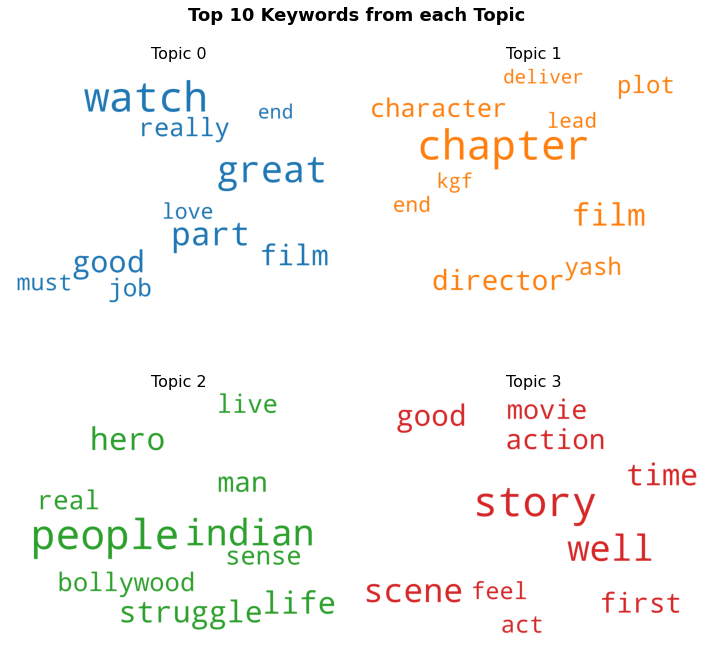

In [37]:
# Wordcloud of Top Keywords words in each topic

import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.suptitle('Top 10 Keywords from each Topic', fontsize=18, fontweight='bold')
plt.show()

### <font color=Dark>We see that some of the keywords in above topics are similar to Keywords extracted earlier, like Watch, Indian, Bollywood, Acting, Scene, Story etc. LDA gives a very generic set of keywords, whereas KeyBERT ngram(2,2) gives a more appropriate set of keywords. </font>

<hr style="border:2px solid gray">

### Getting associated Keywords

In [42]:
#To get associated keywords we will use specific keywords from Reviews and Title

from pytrends.request import TrendReq
pytrend = TrendReq()

#1.Using Reviews n(1,1)
pytrend.build_payload(kw_list=['screenplay'])
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                         query  value
0                      script    100
1           screenplay script     98
2              screenplay pdf     78
3             best screenplay     71
4            movie screenplay     70
5             screenplay film     52
6     how to write screenplay     47
7          screenplay writing     46
8          write a screenplay     46
9          what is screenplay     45
10          screenplay format     40
11  how to write a screenplay     39
12         screenplay meaning     36
13        original screenplay     30
14            screenplay book     29
15       what is a screenplay     24
16          screenplay writer     23
17       writing a screenplay     18
18         adapted screenplay     18
19              screenwriting     15
20   best original screenplay     14
21                screenplays     14
22               movie script     14
23         screenplay example     14
24        screenplay download     13, 'rising':       

In [43]:
#2.Using Reviews n(2,2)
pytrend.build_payload(kw_list=['love story'])
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                       query  value
0          movie love story    100
1                love movie     98
2             story of love     73
3           love story song     61
4                 love song     61
5          love story video     60
6          love story hindi     53
7         love story movies     46
8         love story lyrics     43
9                  japanese     37
10          love story film     36
11            my love story     32
12               love songs     29
13         love story songs     28
14           new love story     27
15          best love story     25
16  love story taylor swift     21
17        love story taylor     21
18    love story full movie     20
19             taylor swift     19
20           story in hindi     18
21         story about love     18
22           love story mp3     18
23      love story in hindi     18
24        school love story     17, 'rising':                                    query  value
0         

In [48]:
#3.Using Title n(1,1)
pytrend.build_payload(kw_list=['masterpiece'])
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                           query  value
0               the masterpiece    100
1             masterpiece movie     41
2               pbs masterpiece     39
3                           pbs     38
4           masterpiece meaning     32
5           masterpiece theater     31
6            masterpiece lyrics     26
7              masterpiece song     22
8                        master     19
9                my masterpiece     18
10                 transformers     16
11     transformers masterpiece     16
12              masterpiece art     15
13        masterpiece malayalam     13
14             masterpiece arms     13
15          masterpiece kannada     12
16         masterpiece victoria     12
17  masterpiece malayalam movie     11
18  masterpiece movie malayalam     11
19           masterpiece series     11
20                     victoria     11
21               masterpiece me     11
22              masterpiece mp3     10
23         masterpiece cakeshop     10
24  

In [45]:
#4.Using Title n(2,2)
pytrend.build_payload(kw_list=['heart touching'])
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                              query  value
0            heart touching quotes    100
1                           quotes     99
2              heart touching love     72
3                             love     72
4   heart touching birthday wishes     49
5                  birthday wishes     49
6                          shayari     48
7           shayari heart touching     43
8                           status     43
9            heart touching status     42
10             heart touching song     39
11            heart touching lines     35
12            heart touching songs     23
13          heart touching message     22
14            heart touching video     21
15      heart touching love quotes     20
16                     love quotes     20
17          heart touching meaning     18
18                    heart images     18
19           heart touching images     18
20         heart touching messages     17
21     heart touching quotes hindi     17
22    heart t